# 4.10 Instacart Grocery Basket Analysis

## Contents

### Importing Libraries

### Importing Data

### Checking and Addressing Security Implications

### Checking and Changing Data Types for Memory Purposes

### Customer Behaviour in Different Geographic Regions

### Creating an Exclusion Flag for Low-Activity Customers

### Customer Profiling

### Visualizing the Distribution of Profiles

### Analyzing Age Group vs Spending Habits

### Analyzing Age Group vs Dependent Status

### Analyzing Age Group vs Income Group

### Analyzing Age Group vs Family Status

### Analyzing Family Status vs Loyalty Status

### Analyzing Loyalty Status vs Age Group

### Analyzing Orders by Day of Week

### Analyzing Order Hour of Day vs Price Range Group

### Analyzing Order Hour of Day vs Total Prices

### Analyzing Price Range Group vs Income Group

### Price Range Group Distribution

### Analyzing Order Frequency by Age Group

### Analyzing Order Frequency by Family Status

### Analyzing Order Volume by Family Status

### Analyzing Order Volume by Age Group

### Analyzing Order Frequency by Loyalty Status

### Analyzing Orders Day of Week by Loyalty Status

### Analyzing Order Frequency by Income Group

### Analyzing Order Frequency by Dependants Status

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Compare Customer Profiles with Regions and Departments

#### Importing Libraries

In [27]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Importing Data

In [29]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [30]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 4\\Instacart Basket Analysis'

In [31]:
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [32]:
#Checking the shape of the dataframe
ords_prods_custs.shape

(32399732, 34)

In [33]:
#Viewing the dataframe
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,7.0,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,7.0,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,7.0,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,7.0,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


#### Checking and Addressing Security Implications

In [35]:
#Dropping the First Name column as part of addressing personally identifiable information in the data
ords_prods_custs = ords_prods_custs.drop(columns = ['First Name'])

In [36]:
#Dropping the Last Name column as part of addressing personally identifiable information in the data
ords_prods_custs = ords_prods_custs.drop(columns = ['Last Name'])

In [37]:
#Checking if the First Name and Last Name columns were removed
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_days_between_orders,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,7.0,14084,2,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,7.0,12427,3,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,7.0,26088,4,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,7.0,26405,5,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [38]:
#Checking the existing columns in the dataframe
ords_prods_custs.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', '_merge'],
      dtype='object')

#### Checking and Changing Data Types for Memory Purposes

In [40]:
#Checking data types for the columns
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 32 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int64   
 1   user_id                     int64   
 2   eval_set                    object  
 3   order_number                int64   
 4   orders_day_of_week          int64   
 5   order_hour_of_day           int64   
 6   days_since_prior_order      float64 
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    int64   
 12  department_id               int64   
 13  prices                      float64 
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

In [41]:
#Changing data types for ords_prods_custs dataframe
ords_prods_custs['order_id']=ords_prods_custs['order_id'].astype('int32')
ords_prods_custs['user_id']=ords_prods_custs['user_id'].astype('int32')
ords_prods_custs['order_number']=ords_prods_custs['order_number'].astype('int8')
ords_prods_custs['orders_day_of_week']=ords_prods_custs['orders_day_of_week'].astype('int8')
ords_prods_custs['order_hour_of_day']=ords_prods_custs['order_hour_of_day'].astype('int32')
ords_prods_custs['days_since_prior_order']=ords_prods_custs['days_since_prior_order'].astype('float16')
ords_prods_custs['product_id']=ords_prods_custs['product_id'].astype('int32')
ords_prods_custs['add_to_cart_order']=ords_prods_custs['add_to_cart_order'].astype('int32')
ords_prods_custs['reordered']=ords_prods_custs['reordered'].astype('int8')
ords_prods_custs['aisle_id']=ords_prods_custs['aisle_id'].astype('int8')
ords_prods_custs['department_id']=ords_prods_custs['department_id'].astype('int8')
ords_prods_custs['prices']=ords_prods_custs['prices'].astype('float16')
ords_prods_custs['Age']=ords_prods_custs['Age'].astype('int8')
ords_prods_custs['number_of_dependants']=ords_prods_custs['number_of_dependants'].astype('int8')

In [42]:
#Checking if data types for the columns were changed
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 32 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int32   
 1   user_id                     int32   
 2   eval_set                    object  
 3   order_number                int8    
 4   orders_day_of_week          int8    
 5   order_hour_of_day           int32   
 6   days_since_prior_order      float16 
 7   product_id                  int32   
 8   add_to_cart_order           int32   
 9   reordered                   int8    
 10  product_name                object  
 11  aisle_id                    int8    
 12  department_id               int8    
 13  prices                      float16 
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

In [43]:
#Removing the eval_set column from ords_prods_custs to reduce memory usage
ords_prods_custs = ords_prods_custs.drop(columns = ['eval_set'])

In [44]:
#Checking the data types and memory usage of the columns
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 31 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int32   
 1   user_id                     int32   
 2   order_number                int8    
 3   orders_day_of_week          int8    
 4   order_hour_of_day           int32   
 5   days_since_prior_order      float16 
 6   product_id                  int32   
 7   add_to_cart_order           int32   
 8   reordered                   int8    
 9   product_name                object  
 10  aisle_id                    int8    
 11  department_id               int8    
 12  prices                      float16 
 13  price_range_loc             object  
 14  busiest_day                 object  
 15  busiest_days                object  
 16  busiest_period_of_day       object  
 17  max_order                   int64   
 18  loyalty_flag                object  
 19

In [45]:
#Viewing the ords_prods_custs dataframe
ords_prods_custs.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_between_orders,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


#### Customer Behaviour in Different Geographic Regions

In [47]:
#Assigning states to the Northeast region
ords_prods_custs.loc[ords_prods_custs['State'] == 'Maine', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'New Hampshire', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Vermont', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Massachusetts', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Rhode Island', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Connecticut', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'New York', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Pennsylvania', 'Region'] = 'Northeast'
ords_prods_custs.loc[ords_prods_custs['State'] == 'New Jersey', 'Region'] = 'Northeast'

In [48]:
#Assigning states to the Midwest region
ords_prods_custs.loc[ords_prods_custs['State'] == 'Wisconsin', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Michigan', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Illinois', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Indiana', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Ohio', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'North Dakota', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'South Dakota', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Nebraska', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Kansas', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Minnesota', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Iowa', 'Region'] = 'Midwest'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Missouri', 'Region'] = 'Midwest'

In [49]:
#Assigning states to the South region
ords_prods_custs.loc[ords_prods_custs['State'] == 'Delaware', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Maryland', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'District of Columbia', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Virginia', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'West Virginia', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'North Carolina', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'South Carolina', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Georgia', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Florida', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Kentucky', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Tennessee', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Mississippi', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Alabama', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Oklahoma', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Texas', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Arkansas', 'Region'] = 'South'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Louisiana', 'Region'] = 'South'

In [50]:
#Assigning states to the West region
ords_prods_custs.loc[ords_prods_custs['State'] == 'Idaho', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Montana', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Wyoming', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Nevada', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Utah', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Colorado', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Arizona', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'New Mexico', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Alaska', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Washington', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Oregon', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'California', 'Region'] = 'West'
ords_prods_custs.loc[ords_prods_custs['State'] == 'Hawaii', 'Region'] = 'West'

In [51]:
#Checking the frequency of the Region column
ords_prods_custs['Region'].value_counts(dropna = False)

Region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [52]:
#Checking the Region column
ords_prods_custs.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge,Region
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [53]:
#Crossing the Region column with the spending_flag column
crosstab = pd.crosstab(ords_prods_custs['Region'], ords_prods_custs['spending_flag'], dropna = False)

In [54]:
#Viewing the crosstab
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


The South region has the largest number of customers of all the regions. This region has the largest numbers in both the high spender and low spender categories which are significantly higher than those of other regions. The West region has the second largest customer numbers, followed by the Midwest and then the Northeast. The South having the higest customer numbers may be due to the fact that this region has more states and a higher population than the other regions.

#### Creating an Exclusion Flag for Low-Activity Customers

In [57]:
#Creating flags for low-activity and high-activity customers
ords_prods_custs.loc[ords_prods_custs['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_custs.loc[ords_prods_custs['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [58]:
#Checking the frequency of the activity_flag column
ords_prods_custs['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30959687
low-activity customer      1440045
Name: count, dtype: int64

In [59]:
#Checking the activity_flag column
ords_prods_custs.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,number_of_dependants,family_status,income,_merge,Region,activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer


In [60]:
cust_high_activity = ords_prods_custs[ords_prods_custs['activity_flag'] == 'high-activity customer']

In [61]:
#Checking the shape of cust_high_activity
cust_high_activity.shape

(30959687, 33)

In [62]:
#Exporting the cust_high_activity dataframe
cust_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_custs_excluded.pkl'))

#### Customer Profiling

In [64]:
#Creating an age variable
cust_high_activity.loc[cust_high_activity['Age'] <= 25, 'Age_group'] = 'young adult'
cust_high_activity.loc[(cust_high_activity['Age'] > 25) & (cust_high_activity['Age'] <= 44), 'Age_group'] = 'adult'
cust_high_activity.loc[(cust_high_activity['Age'] > 44) & (cust_high_activity['Age'] <= 64), 'Age_group'] = 'middle-aged'
cust_high_activity.loc[cust_high_activity['Age'] > 64, 'Age_group'] = 'senior'

C:\Users\Priya\AppData\Local\Temp\ipykernel_10976\1459086560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_high_activity.loc[cust_high_activity['Age'] <= 25, 'Age_group'] = 'young adult'


In [65]:
#Checking the frequency of the Age_group column
cust_high_activity['Age_group'].value_counts(dropna = False)

Age_group
middle-aged    9688461
adult          9213092
senior         8194267
young adult    3863867
Name: count, dtype: int64

In [66]:
#Creating an income variable
cust_high_activity.loc[cust_high_activity['income'] <= 55000, 'Income_group'] = 'low income'
cust_high_activity.loc[(cust_high_activity['income'] > 55000) & (cust_high_activity['income'] <= 150000), 'Income_group'] = 'middle income'
cust_high_activity.loc[cust_high_activity['income'] > 150000, 'Income_group'] = 'high income'

C:\Users\Priya\AppData\Local\Temp\ipykernel_10976\671407748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_high_activity.loc[cust_high_activity['income'] <= 55000, 'Income_group'] = 'low income'


In [67]:
#Checking the frequency of the Income_group column
cust_high_activity['Income_group'].value_counts(dropna = False)

Income_group
middle income    22616459
low income        4452388
high income       3890840
Name: count, dtype: int64

In [68]:
#Creating a dependants_flag variable
cust_high_activity.loc[cust_high_activity['number_of_dependants'] == 0, 'dependants_flag'] = 'no dependants'
cust_high_activity.loc[cust_high_activity['number_of_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\Priya\AppData\Local\Temp\ipykernel_10976\3506800113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_high_activity.loc[cust_high_activity['number_of_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [69]:
#Checking the frequency of the dependants_flag column
cust_high_activity['dependants_flag'].value_counts(dropna = False)

dependants_flag
has dependants    23221179
no dependants      7738508
Name: count, dtype: int64

In [70]:
#Importing departments dataset
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [71]:
#Checking the shape of the departments dataframe
departments.shape

(21, 2)

In [72]:
#Viewing the departments dataframe
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [73]:
#Renaming Unnamed: 0 column to department_id
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [74]:
#Checking if the Unnamed: 0 column was renamed to department_id
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [75]:
#Viewing the cust_high_activity dataframe
cust_high_activity.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,family_status,income,_merge,Region,activity_flag,Age_group,Income_group,dependants_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,both,South,high-activity customer,adult,low income,has dependants


In [76]:
#Removing the _merge column from cust_high_activity
cust_high_activity = cust_high_activity.drop(columns = ['_merge'])

In [77]:
#Checking the existing columns in the dataframe
cust_high_activity.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'Region',
       'activity_flag', 'Age_group', 'Income_group', 'dependants_flag'],
      dtype='object')

In [78]:
#Checking the shape of cust_high_activity
cust_high_activity.shape

(30959687, 35)

In [79]:
#Checking data type of department_id column in cust_high_activity dataframe
cust_high_activity.dtypes['department_id']

dtype('int8')

In [80]:
#Checking data type of department_id column in departments dataframe
departments.dtypes['department_id']

dtype('int64')

In [81]:
#Checking data types in the departments dataframe
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [82]:
#Changing the data type of the department_id column in the departments dataframe
departments['department_id']=departments['department_id'].astype('int8')

In [83]:
#Checking if the department_id column's data type was changed in the departments dataframe
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int8  
 1   department     21 non-null     object
dtypes: int8(1), object(1)
memory usage: 321.0+ bytes


In [84]:
#Merging the cust_high_activity and departments dataframes
cust_dept_merged = cust_high_activity.merge(departments, on = 'department_id', indicator = True)

In [85]:
#Viewing the merged dataframe
cust_dept_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,family_status,income,Region,activity_flag,Age_group,Income_group,dependants_flag,department,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,3,married,40423,South,high-activity customer,adult,low income,has dependants,beverages,both
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,high-activity customer,adult,low income,has dependants,dairy eggs,both
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,3,married,40423,South,high-activity customer,adult,low income,has dependants,snacks,both
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,high-activity customer,adult,low income,has dependants,snacks,both
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,high-activity customer,adult,low income,has dependants,household,both


In [86]:
#Checking the shape of the merged dataframe
cust_dept_merged.shape

(30959687, 37)

In [87]:
#Checking the results of the merge
cust_dept_merged['_merge'].value_counts()

_merge
both          30959687
left_only            0
right_only           0
Name: count, dtype: int64

In [88]:
#Checking the columns in the merged dataframe
cust_dept_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'Region',
       'activity_flag', 'Age_group', 'Income_group', 'dependants_flag',
       'department', '_merge'],
      dtype='object')

In [89]:
#Exporting the cust_dept_merged dataframe
cust_dept_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_departments_merged.pkl'))

#### Visualizing the Distribution of Profiles

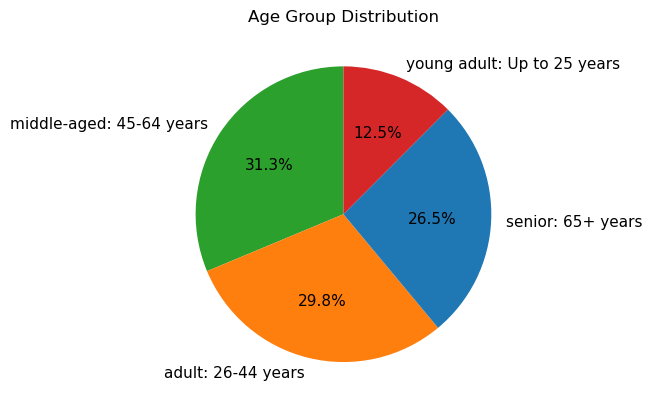

In [91]:
#Creating a pie chart for the Age_group variable
age_group_pie = cust_high_activity['Age_group'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: Up to 25 years'], startangle=90, fontsize=11, colors=['tab:green','tab:orange','tab:blue','tab:red'])
plt.ylabel('')
plt.title('Age Group Distribution')
plt.show()

In [92]:
#Exporting age_group_pie
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

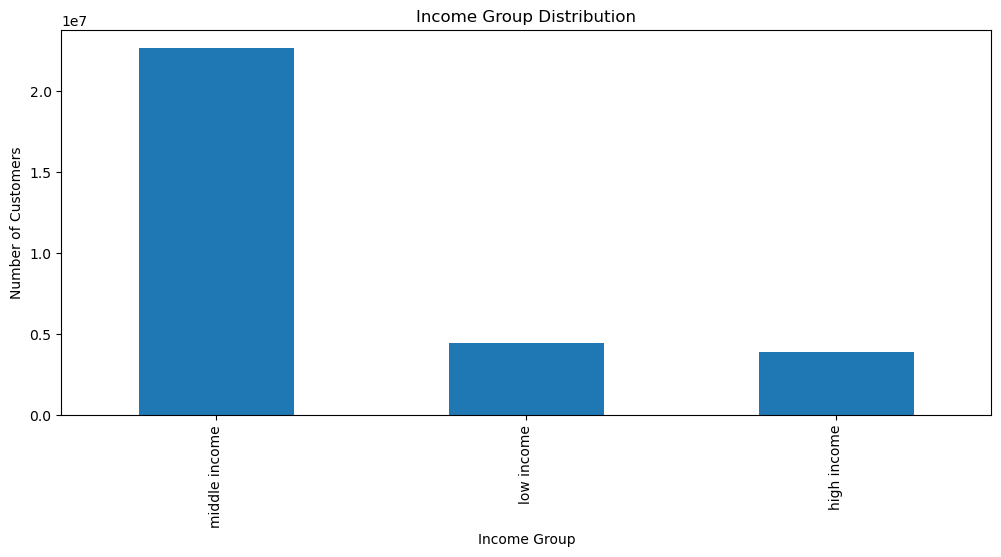

In [93]:
#Creating a bar chart for the income variable
income_group_bar = cust_high_activity['Income_group'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.show()

In [94]:
#Exporting income_group_bar
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution_bar.png'), bbox_inches='tight')

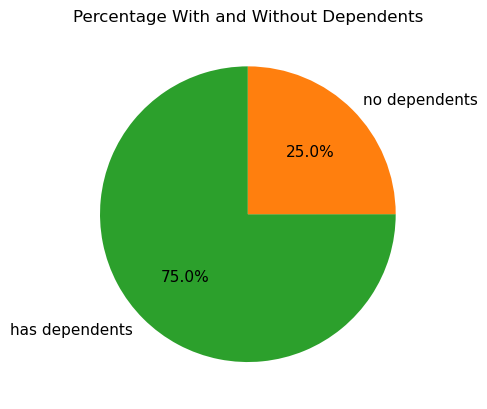

In [95]:
#Creating a pie chart for the dependants_flag variable
dependents_pie = cust_high_activity['dependants_flag'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', labels= ['has dependents', 'no dependents'], startangle=90, fontsize=11, colors=['tab:green','tab:orange'])
plt.ylabel('')
plt.title('Percentage With and Without Dependents')
plt.show()

In [96]:
#Exporting dependants_pie
dependents_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_distribution_pie.png'))

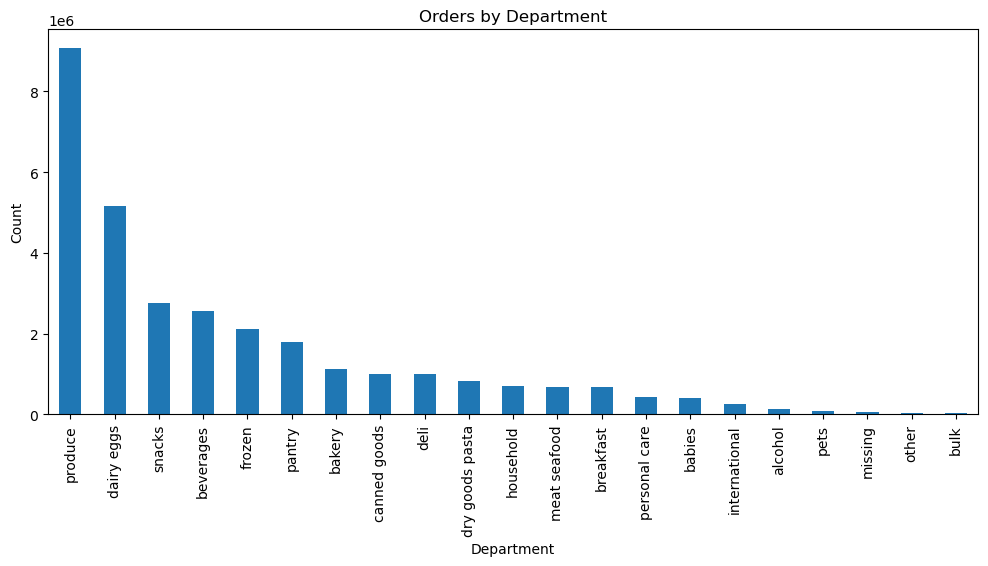

In [97]:
#Creating a bar chart for the department variable
department_bar = cust_dept_merged['department'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [98]:
#Exporting department_bar
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_orders_bar.png'), bbox_inches='tight')

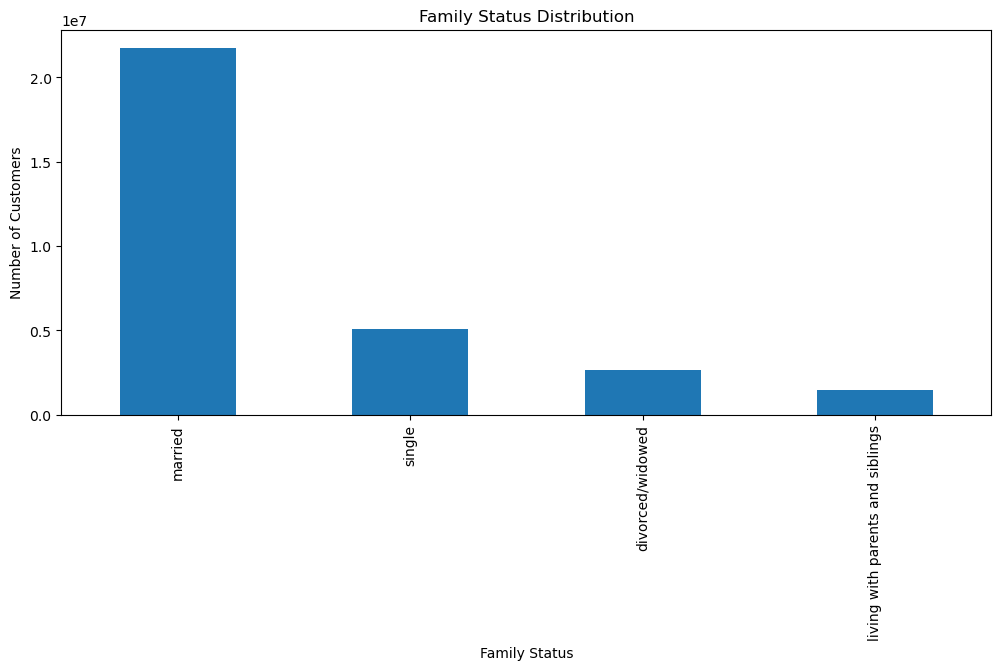

In [432]:
#Creating a bar chart for the family_status variable
family_status_distribution_bar = cust_high_activity['family_status'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Family Status Distribution')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.show()

In [434]:
#Exporting family_status_distribution_bar
family_status_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_distribution_bar.png'), bbox_inches='tight')

#### Analyzing Age Group vs Spending Habits

In [105]:
#Crossing Age_group with spending_flag
age_spending_crosstab = pd.crosstab(cust_high_activity['spending_flag'], cust_high_activity['Age_group'], dropna = False)

In [106]:
#Viewing the age_spending_crosstab
age_spending_crosstab

Age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,28062,31118,26874,11382
Low spender,9185030,9657343,8167393,3852485


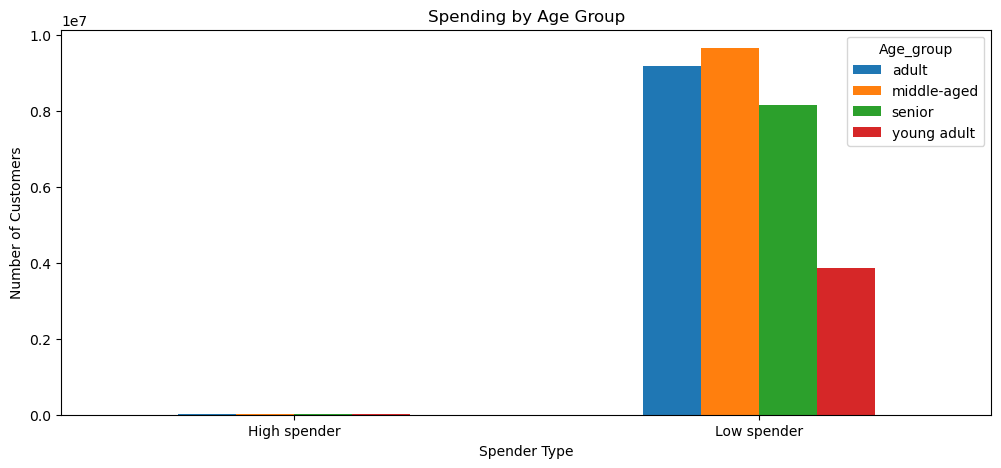

In [107]:
#Creating a bar chart for the age_spending_crosstab
age_spending_bar = age_spending_crosstab.plot.bar(figsize=(12, 5))
plt.title('Spending by Age Group')
plt.xlabel('Spender Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [108]:
#Exporting age_spending_bar
age_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending_bar.png'))

#### Analyzing Age Group vs Dependent Status

In [110]:
#Crossing Age_group with dependants_flag
age_dependants_crosstab = pd.crosstab(cust_high_activity['dependants_flag'], cust_high_activity['Age_group'], dropna = False)

In [111]:
#Viewing the age_dependants_crosstab
age_dependants_crosstab

Age_group,adult,middle-aged,senior,young adult
dependants_flag,,,,
has dependants,6900203,7237512,6172663,2910801
no dependants,2312889,2450949,2021604,953066


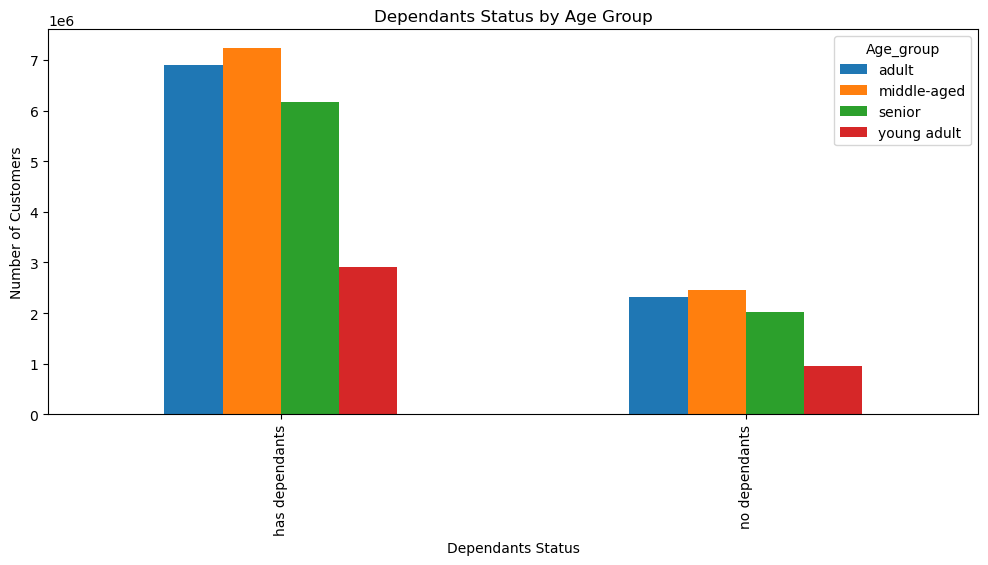

In [112]:
#Creating a bar chart for the age_dependants_crosstab
age_dependents_bar = age_dependants_crosstab.plot.bar(figsize=(12, 5))
plt.title('Dependants Status by Age Group')
plt.xlabel('Dependants Status')
plt.ylabel('Number of Customers')
plt.show()

In [113]:
#Exporting age_dependants_bar
age_dependents_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_bar.png'), bbox_inches='tight')

#### Analyzing Age Group vs Income Group

In [115]:
#Crossing Age_group with Income_group
age_income_crosstab = pd.crosstab(cust_high_activity['Income_group'], cust_high_activity['Age_group'], dropna = False)

In [116]:
#Viewing the age_income_crosstab
age_income_crosstab

Age_group,adult,middle-aged,senior,young adult
Income_group,,,,
high income,449688,1861326,1543435,36391
low income,1824460,951746,796354,879828
middle income,6938944,6875389,5854478,2947648


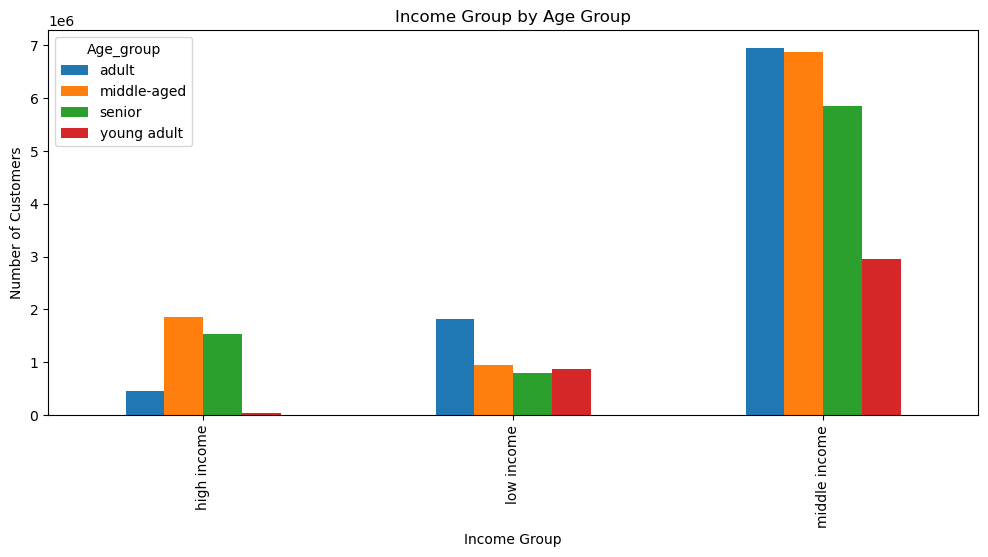

In [117]:
#Creating a bar chart for the age_income_crosstab
age_income_bar = age_income_crosstab.plot.bar(figsize=(12, 5))
plt.title('Income Group by Age Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.show()

In [118]:
#Exporting age_income_bar
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_bar.png'), bbox_inches='tight')

#### Analyzing Age Group vs Family Status

In [120]:
#Crossing Age_group with family_status
age_family_crosstab = pd.crosstab(cust_high_activity['family_status'], cust_high_activity['Age_group'], dropna = False)

In [121]:
#Viewing the age_family_crosstab
age_family_crosstab

Age_group,adult,middle-aged,senior,young adult
family_status,,,,
divorced/widowed,0,623227,2021604,0
living with parents and siblings,0,0,0,1480979
married,6900203,7237512,6172663,1429822
single,2312889,1827722,0,953066


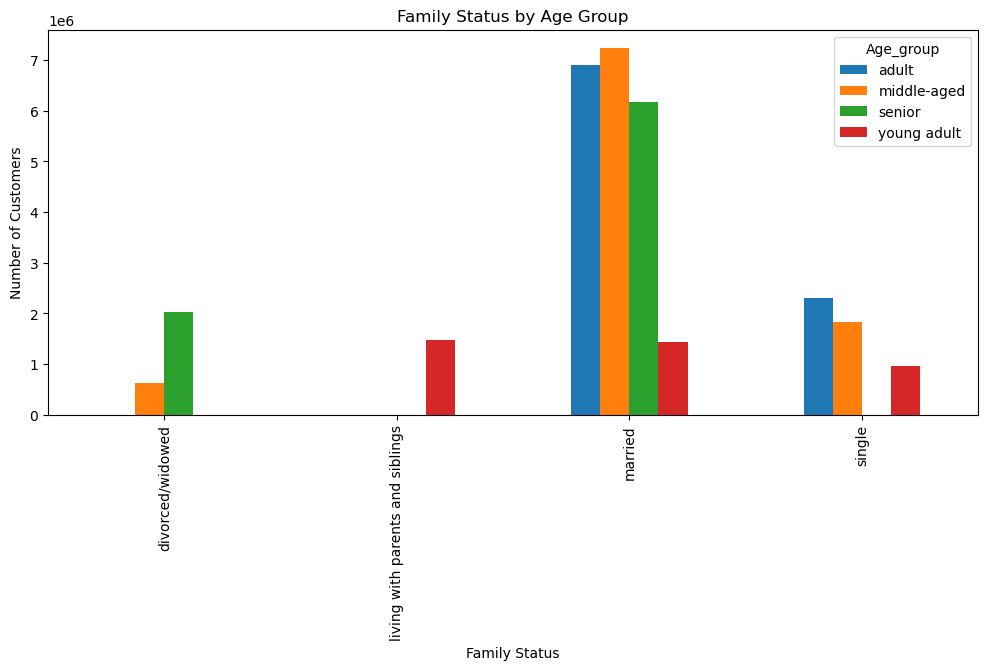

In [122]:
#Creating a bar chart for the age_family_crosstab
age_family_bar = age_family_crosstab.plot.bar(figsize=(12, 5))
plt.title('Family Status by Age Group')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.show()

In [123]:
#Exporting age_family_bar
age_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_family_bar.png'), bbox_inches='tight')

#### Analyzing Family Status vs Loyalty Status

In [125]:
#Crossing family_status with loyalty_flag
family_loyalty_crosstab = pd.crosstab(cust_high_activity['family_status'], cust_high_activity['loyalty_flag'], dropna = False)

In [126]:
#Viewing the family_loyalty_crosstab
family_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
family_status,,,
divorced/widowed,882617,403689,1358525
living with parents and siblings,492679,221743,766557
married,7201553,3380032,11158615
single,1705914,797332,2590431


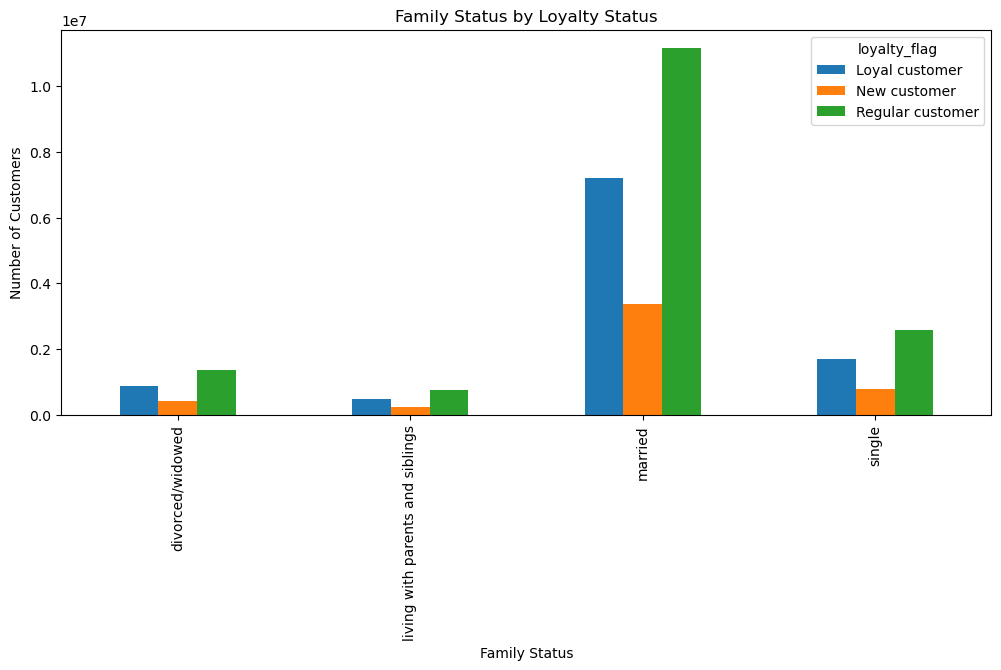

In [127]:
#Creating a bar chart for the family_loyalty_crosstab
family_loyalty_bar = family_loyalty_crosstab.plot.bar(figsize=(12, 5))
plt.title('Family Status by Loyalty Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.show()

In [128]:
#Exporting family_loyalty_bar
family_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_loyalty_bar.png'), bbox_inches='tight')

#### Analyzing Loyalty Status vs Age Group

In [399]:
#Crossing loyalty_flag with Age_group
loyalty_age_crosstab = pd.crosstab(cust_high_activity['Age_group'], cust_high_activity['loyalty_flag'], dropna = False)

In [402]:
#Viewing the loyalty_age_crosstab
loyalty_age_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
Age_group,,,
adult,3047837,1420253,4745002
middle-aged,3231150,1506356,4950955
senior,2723588,1276424,4194255
young adult,1280188,599763,1983916


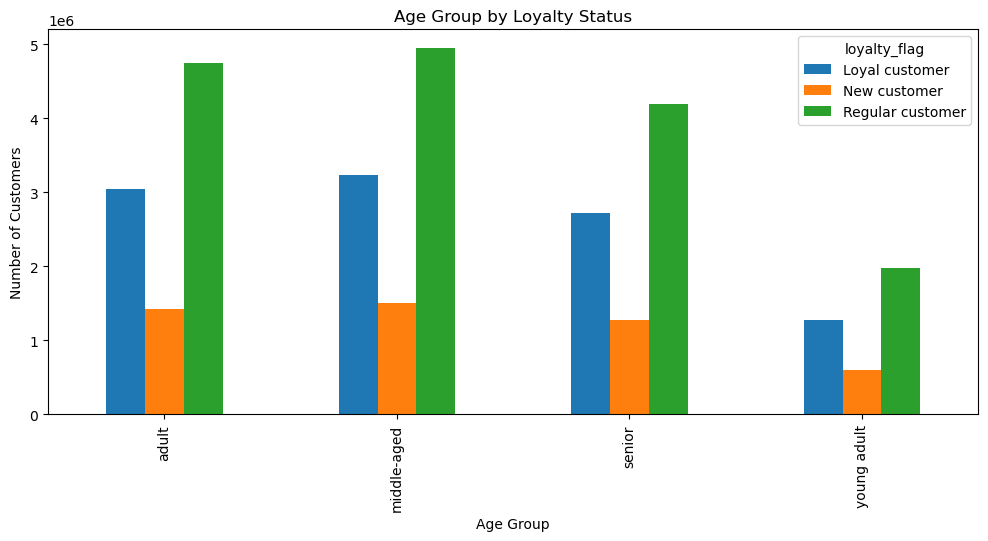

In [404]:
#Creating a bar chart for the loyalty_age_crosstabl
loyalty_age_bar = loyalty_age_crosstab.plot.bar(figsize=(12, 5))
plt.title('Age Group by Loyalty Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

In [406]:
#Exporting loyalty_age_bar
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_bar.png'), bbox_inches='tight')

#### Analyzing Orders by Day of Week

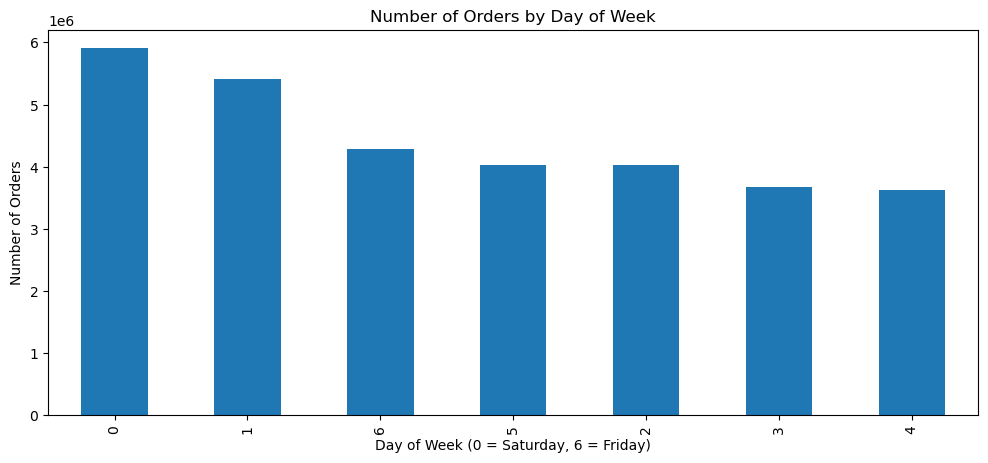

In [130]:
#Creating a bar chart for orders_day_of_week
orders_day_of_week_bar = cust_high_activity['orders_day_of_week'].value_counts().plot.bar(figsize=(12, 5))
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week (0 = Saturday, 6 = Friday)')
plt.ylabel('Number of Orders')
plt.show()

In [131]:
#Exporting orders_day_of_week_bar
orders_day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week_bar.png'), bbox_inches='tight')

#### Analyzing Order Hour of Day vs Price Range Group

In [133]:
#Crossing order_hour_of_day with price_range_loc
order_hour_price_range_crosstab = pd.crosstab(cust_high_activity['order_hour_of_day'], cust_high_activity['price_range_loc'], dropna = False)

In [134]:
#Viewing the order_hour_price_range_crosstab
order_hour_price_range_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2618,64819,140579
1,1319,34033,74253
2,871,20622,44184
3,599,15029,33156
4,654,15711,34388
5,1001,26074,57326
6,3579,86902,190489
7,11147,267170,584769
8,20911,518313,1119642


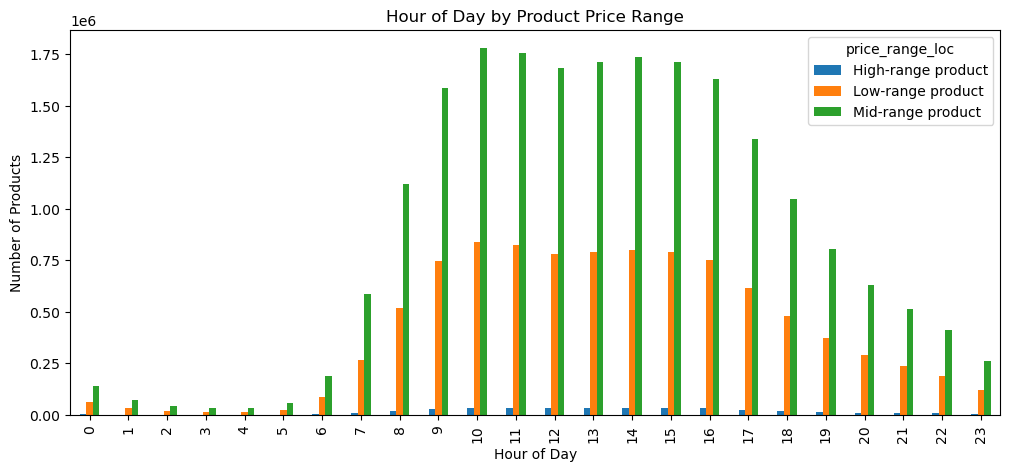

In [135]:
#Creating a bar chart for the order_hour_price_range_crosstab
order_hour_price_range_bar = order_hour_price_range_crosstab.plot.bar(figsize=(12, 5))
plt.title('Hour of Day by Product Price Range')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Products')
plt.show()

In [136]:
#Exporting order_hour_price_range_bar
order_hour_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_price_range_bar.png'), bbox_inches='tight')

#### Analyzing Order Hour of Day vs Total Prices

In [138]:
#Creating a subset for order_hour_of_day and the sum of prices
cust_high_activity_2 = cust_high_activity.groupby('order_hour_of_day', as_index=False).sum('prices')

In [139]:
#Viewing the subset
cust_high_activity_2

,order_hour_of_day,order_id,user_id,order_number,orders_day_of_week,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_product_price,median_days_between_orders,Age,number_of_dependants,income
0,0,359007768761,21568322333,3431862,581826,2380419.0,5319925675,1787656,121228,13433368,2015030,1.624981e+06,6754519,1.626410e+06,2047557.0,10191743,314275,20602716322
1,1,188096212532,11493993806,1766597,309808,1284102.0,2800327004,936811,63004,7094373,1055424,8.556431e+05,3430300,8.561292e+05,1093191.0,5384604,166118,10906083340
2,2,111919798053,6814080302,1083405,190145,755466.0,1679483973,555911,37649,4245748,639454,5.125261e+05,2065598,5.136759e+05,641611.0,3225335,96920,6557107899
3,3,83408224799,5127326818,828589,144738,576642.0,1243586077,420948,28087,3157472,475731,3.819733e+05,1532715,3.824820e+05,491909.0,2416040,73117,4873978009
4,4,87112843030,5224765936,899991,153141,611859.0,1297022573,457918,29736,3268063,491163,3.980087e+05,1698818,3.967554e+05,483019.5,2516724,76048,5143979324
5,5,144102142808,8685212417,1601834,251105,951092.0,2155827765,714219,52543,5427441,815775,6.609575e+05,3002875,6.600369e+05,772449.0,4191210,126155,8565575936
6,6,477156313211,29033712326,5658888,818889,2900680.0,7182515085,2401182,182420,18177319,2781513,2.197097e+06,10939014,2.197505e+06,2392392.0,13847471,420342,28207502224
7,7,1471017789456,88624423840,17519121,2463796,8775721.0,22054690655,7361272,567009,55909359,8588525,6.750456e+06,33364811,6.742284e+06,7443351.5,42858800,1288467,86941668158
8,8,2837634298415,170270350958,32762931,4542098,16855272.0,42406532709,14185316,1071024,107710463,16646962,1.292224e+07,62534834,1.290568e+07,14480847.0,82223914,2489609,165481187936
9,9,4033561335454,243119769362,45565604,6303949,24234730.0,60432784499,20140059,1497864,153498198,23844638,1.831985e+07,87163503,1.829087e+07,21053699.0,116932424,3537549,232684287772


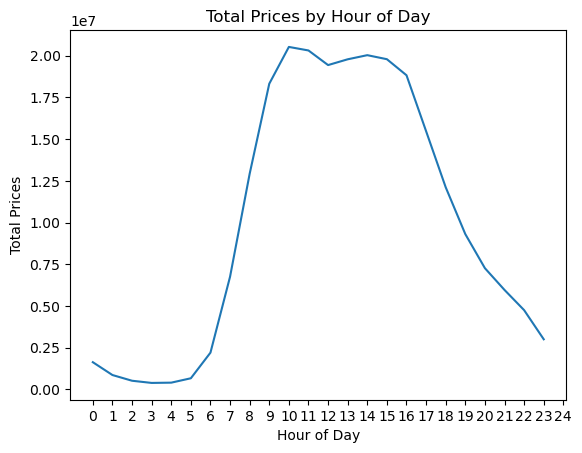

In [140]:
#Creating a line chart for the prices and order_hour_of_day columns
line = sns.lineplot(data = cust_high_activity_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Total Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices')
plt.xticks(np.arange(0, 25, step = 1))
plt.show()

In [141]:
#Exporting lineplot
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_total_prices_line.png'), bbox_inches='tight')

#### Analyzing Price Range Group vs Income Group

In [143]:
#Crossing price_range_loc with Income_group
price_range_income_crosstab = pd.crosstab(cust_high_activity['price_range_loc'], cust_high_activity['Income_group'], dropna = False)

In [144]:
#Viewing the price_range_income_crosstab
price_range_income_crosstab

Income_group,high income,low income,middle income
price_range_loc,,,
High-range product,53428,29419,310229
Low-range product,1161714,1755433,6757693
Mid-range product,2675698,2667536,15548537


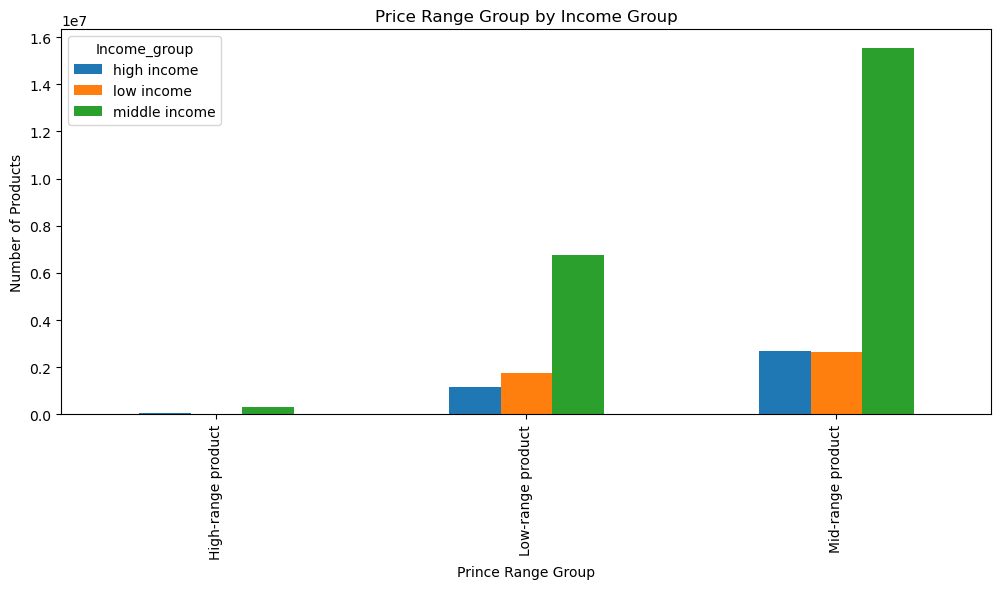

In [145]:
#Creating a bar chart for the price_range_income_crosstab
price_range_income_bar = price_range_income_crosstab.plot.bar(figsize=(12, 5))
plt.title('Price Range Group by Income Group')
plt.xlabel('Prince Range Group')
plt.ylabel('Number of Products')
plt.show()

In [146]:
#Exporting price_range_income_bar
price_range_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_income_bar.png'), bbox_inches='tight')

#### Price Range Group Distribution

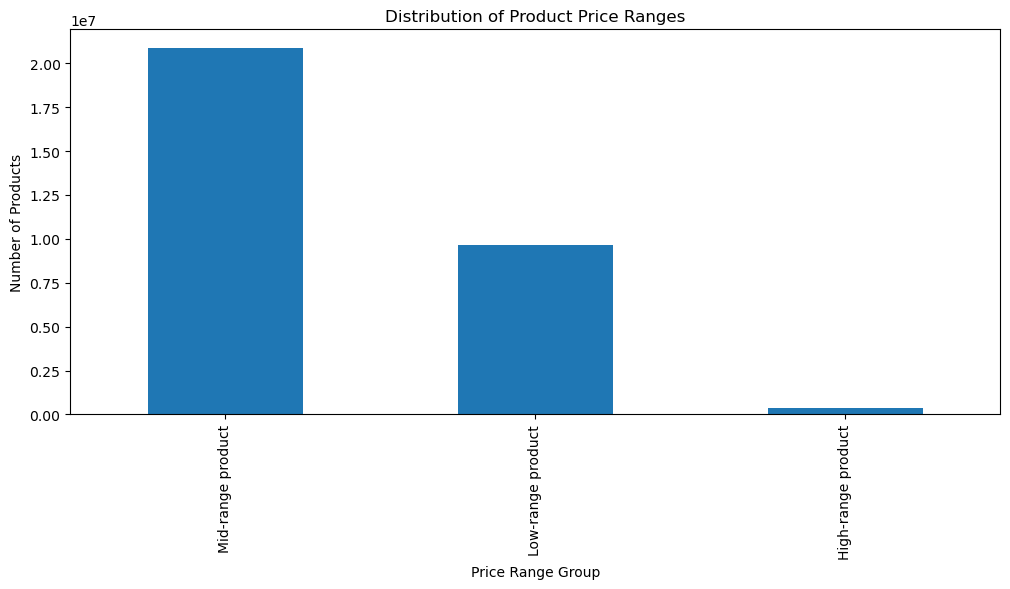

In [148]:
#Creating a bar chart for the price_range_loc variable
price_range_bar = cust_high_activity['price_range_loc'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Distribution of Product Price Ranges')
plt.xlabel('Price Range Group')
plt.ylabel('Number of Products')
plt.show()

In [149]:
#Exporting price_range_bar
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_distribution_bar.png'), bbox_inches='tight')

#### Analyzing Order Frequency by Age Group

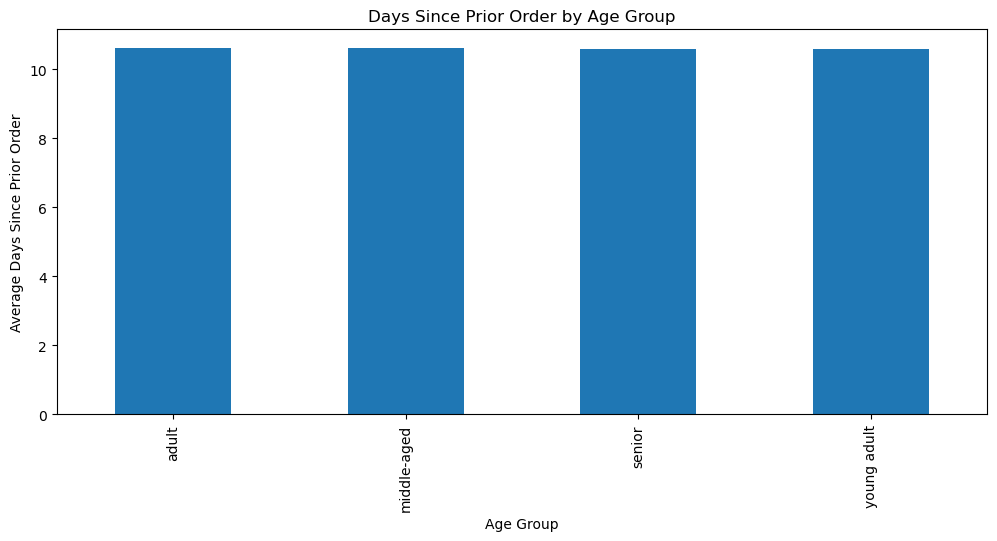

In [158]:
#Creating a bar chart for the Age_group and days_since_prior_order columns
age_group_days_prior_bar = cust_high_activity.groupby('Age_group').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [159]:
#Exporting age_group_days_prior_bar
age_group_days_prior_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_days_prior_order_bar.png'), bbox_inches='tight')

#### Analyzing Order Frequency by Family Status

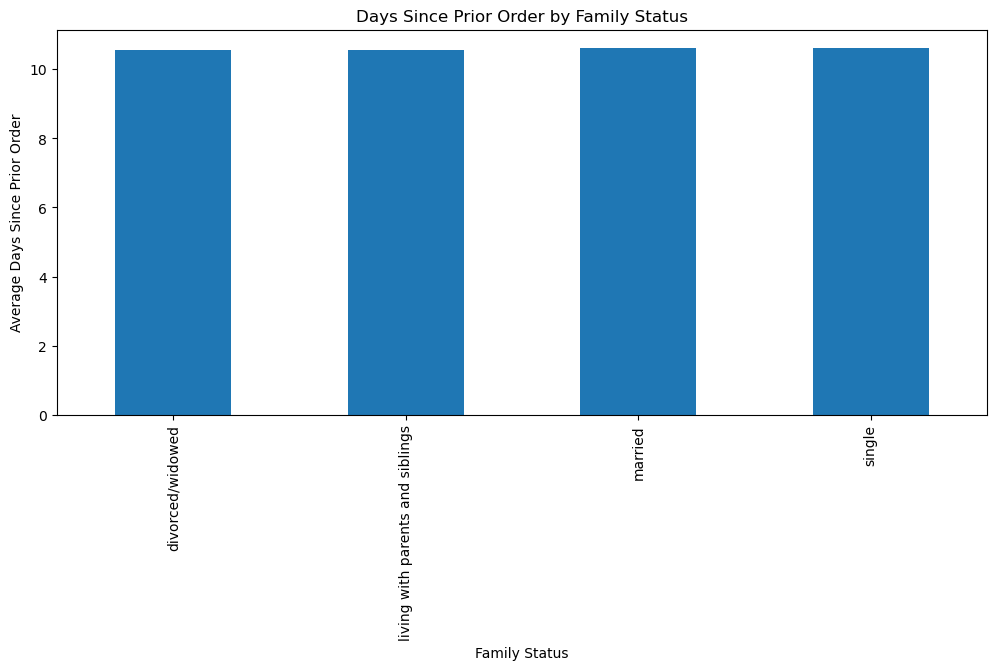

In [384]:
#Creating a bar chart for the family_status and days_since_prior_order columns
family_status_days_prior_bar = cust_high_activity.groupby('family_status').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [162]:
#Exporting family_status_days_prior_bar
family_status_days_prior_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_days_prior_bar.png'), bbox_inches='tight')

#### Analyzing Order Volume by Family Status

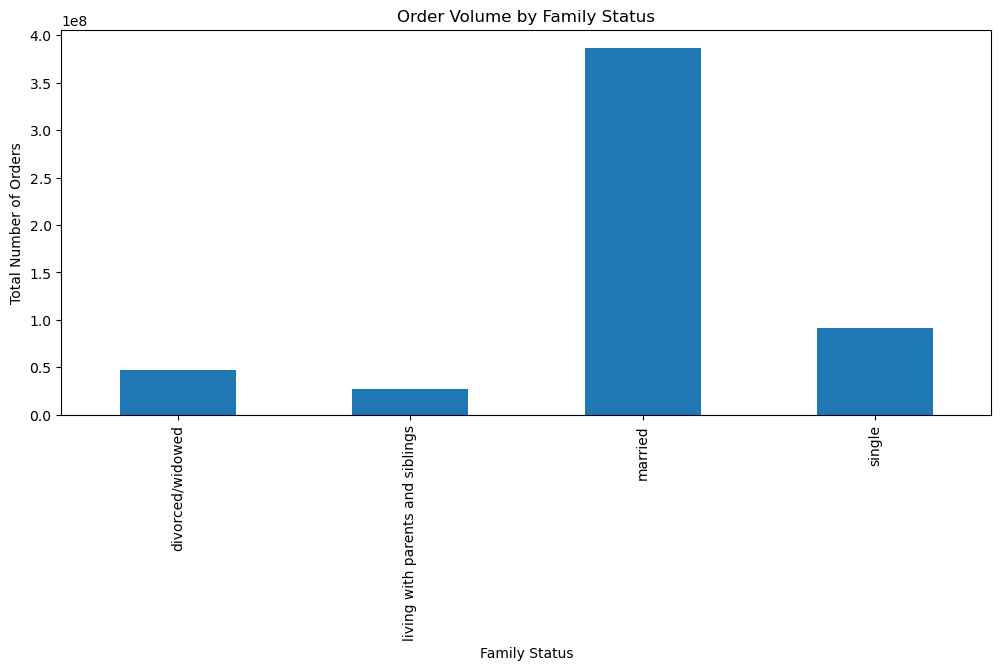

In [391]:
#Creating a bar chart for the family_status and order_number columns
family_status_order_number_bar = cust_high_activity.groupby('family_status').agg({'order_number' : ['sum']}).plot.bar(figsize=(12, 5))
plt.title('Order Volume by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Total Number of Orders')
plt.legend().remove()
plt.show()

In [393]:
#Exporting family_status_order_number_bar
family_status_order_number_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_order_number_bar.png'), bbox_inches='tight')

#### Analyzing Order Volume by Age Group

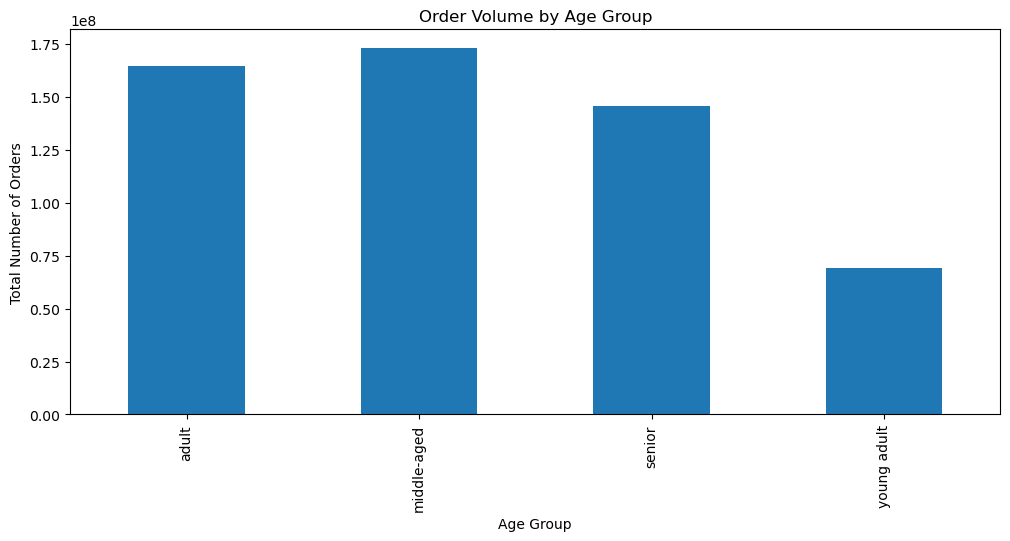

In [395]:
#Creating a bar chart for the Age_group and order_number columns
age_group_order_number_bar = cust_high_activity.groupby('Age_group').agg({'order_number' : ['sum']}).plot.bar(figsize=(12, 5))
plt.title('Order Volume by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Orders')
plt.legend().remove()
plt.show()

In [397]:
#Exporting age_group_order_number_bar
age_group_order_number_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_order_number_bar.png'), bbox_inches='tight')

#### Analyzing Order Frequency by Loyalty Status

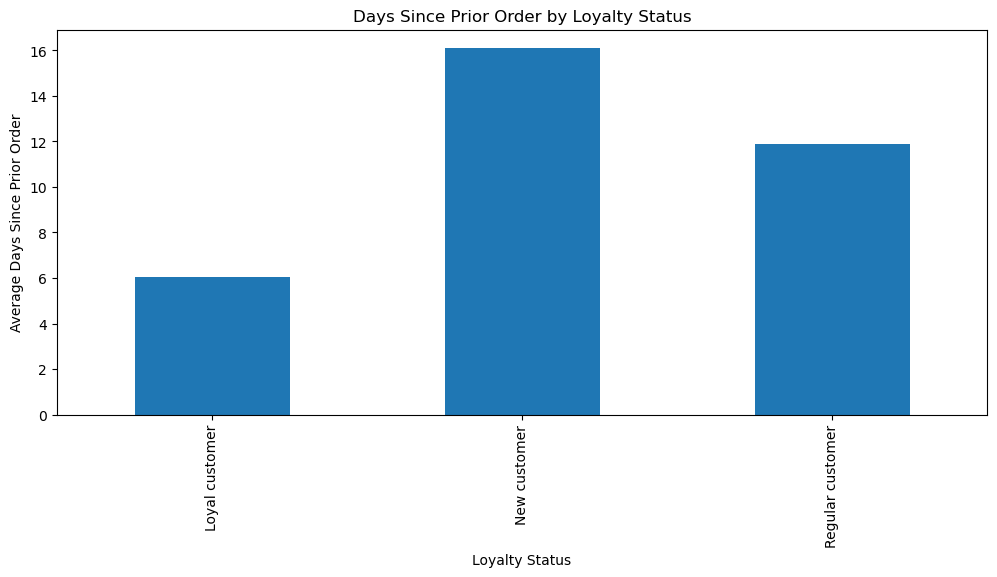

In [409]:
#Creating a bar chart for the days_since_prior_order and loyalty_flag columns
loyalty_days_prior_order_bar = cust_high_activity.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [411]:
#Exporting loyalty_days_prior_order_bar
loyalty_days_prior_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_days_prior_order_bar.png'), bbox_inches='tight')

#### Analyzing Orders Day of Week by Loyalty Status

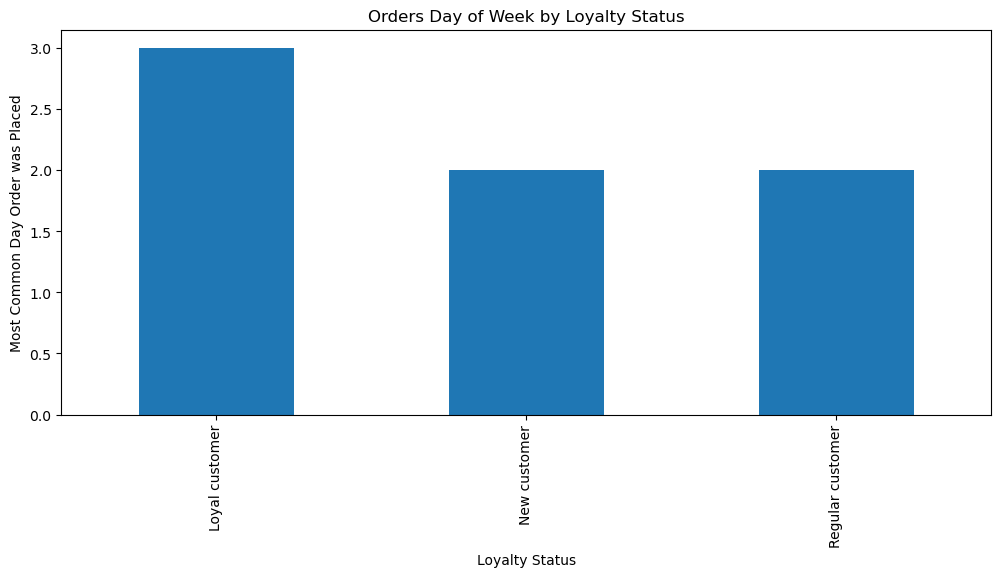

In [418]:
#Creating a bar chart for the orders_day_of_week and loyalty_flag columns
loyalty_orders_day_bar = cust_high_activity.groupby('loyalty_flag').agg({'orders_day_of_week' : ['median']}).plot.bar(figsize=(12, 5))
plt.title('Orders Day of Week by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Most Common Day Order was Placed')
plt.legend().remove()
plt.show()

In [420]:
#Exporting loyalty_orders_day_bar
loyalty_orders_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_orders_day_bar.png'), bbox_inches='tight')

#### Analyzing Order Frequency by Income Group

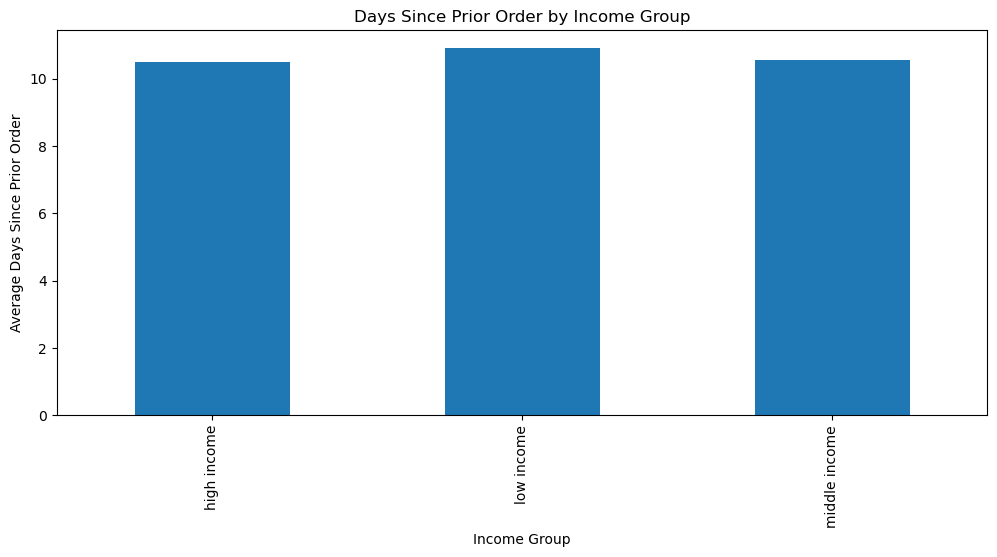

In [438]:
#Creating a bar chart for the days_since_prior_order and Income_group columns
income_days_prior_order_bar = cust_high_activity.groupby('Income_group').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [440]:
#Exporting income_days_prior_order_bar
income_days_prior_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_days_prior_order_bar.png'), bbox_inches='tight')

#### Analyzing Order Frequency by Dependants Status

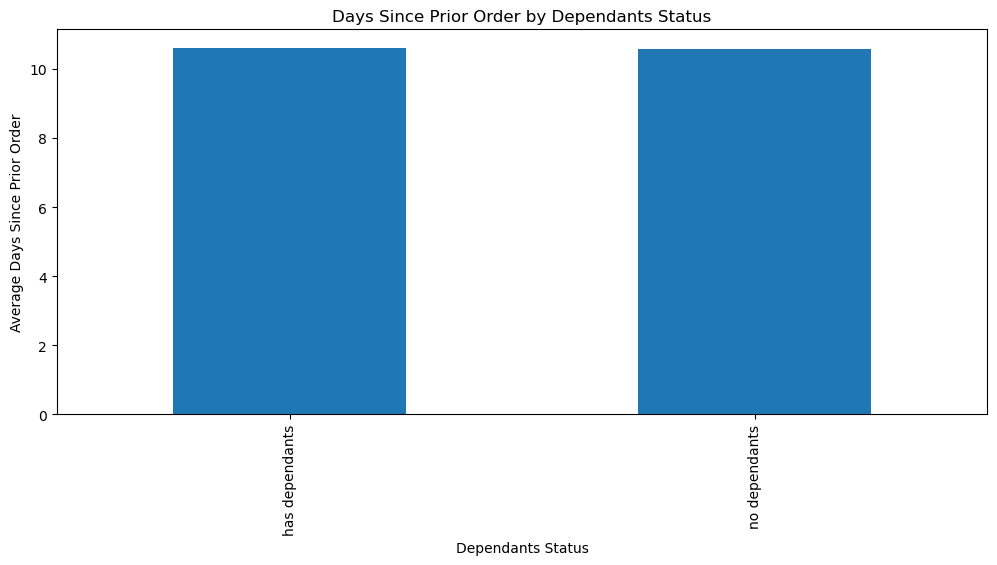

In [443]:
#Creating a bar chart for the days_since_prior_order and dependants_flag columns
dependants_days_prior_order_bar = cust_high_activity.groupby('dependants_flag').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Dependants Status')
plt.xlabel('Dependants Status')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [445]:
#Exporting dependants_days_prior_order_bar
dependants_days_prior_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_days_prior_order_bar.png'), bbox_inches='tight')

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [165]:
#Aggregating the max, mean, and min variables for usage frequency
cust_dept_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

order_number                days_since_prior_order                
                 max min       mean                    max  min       mean
user_id                                                                   
1                 10   1   5.813559                   30.0  0.0  19.135593
2                 14   1   8.035897                   30.0  3.0  15.369231
3                 12   1   6.000000                   21.0  7.0  10.977273
4                  5   1   2.888889                   21.0  0.0  13.500000
7                 20   1   9.645631                   30.0  2.0  13.165049
...              ...  ..        ...                    ...  ...        ...
206203             5   1   2.983193                   30.0  7.0  25.016808
206206            67   1  38.007018                   15.0  0.0   4.084210
206207            16   1   8.116592                   30.0  1.0  14.031390
206208            49   1  25.505170                   20.0  0.0   7.434269
206209            13   1   6.937984                   30.0  3.0  18.937984

[162631 rows x 6 columns]

In [166]:
#Aggregating the max, mean, and min variables for expenditure
cust_dept_merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number                    prices                    
                 max min       mean        max       min      mean
user_id                                                           
1                 10   1   5.813559  14.000000  1.000000  6.367535
2                 14   1   8.035897  14.796875  1.299805  7.515725
3                 12   1   6.000000  14.398438  1.299805  8.197565
4                  5   1   2.888889  14.601562  1.400391  8.205296
7                 20   1   9.645631  23.203125  1.099609  7.466626
...              ...  ..        ...        ...       ...       ...
206203             5   1   2.983193  25.000000  1.000000  7.138590
206206            67   1  38.007018  14.796875  1.099609  7.646947
206207            16   1   8.116592  24.703125  1.200195  7.312859
206208            49   1  25.505170  21.593750  1.099609  8.366576
206209            13   1   6.937984  18.796875  1.099609  7.058352

[162631 rows x 6 columns]

#### Compare Customer Profiles with Regions and Departments

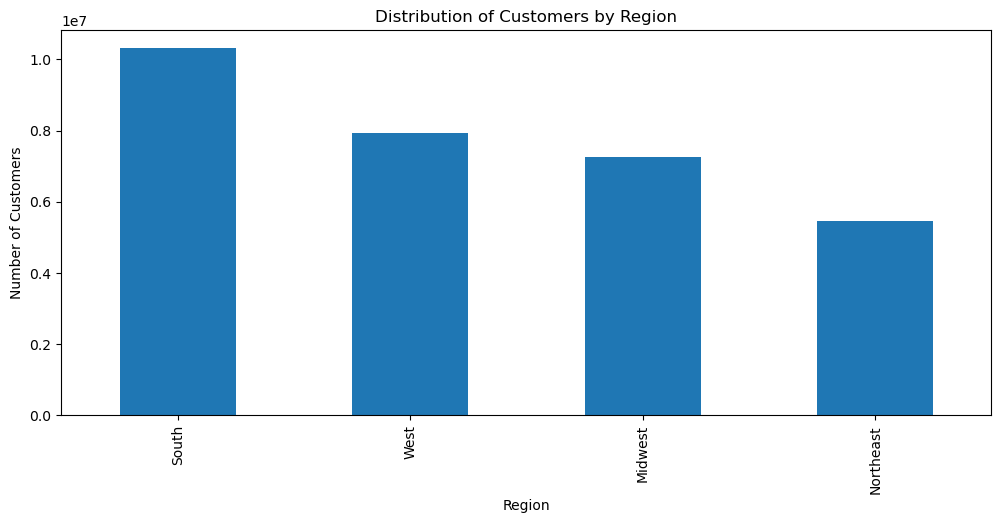

In [168]:
#Creating a bar chart for the Region variable
region_bar = cust_dept_merged['Region'].value_counts(dropna = False).plot.bar(figsize=(12, 5))
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [169]:
#Exporting region_bar
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_distribution_bar.png'), bbox_inches='tight')

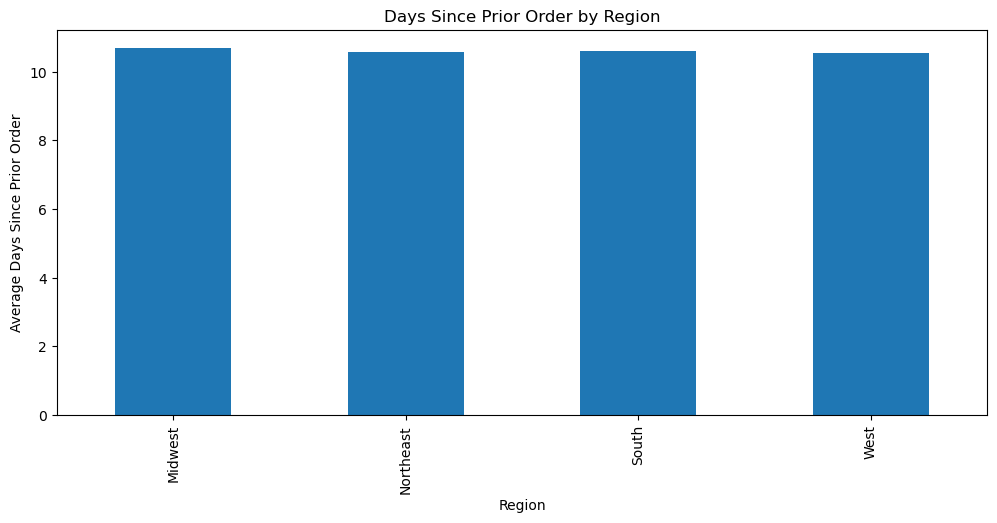

In [424]:
#Creating a bar chart for the Region and days_since_prior_order columns
region_days_prior_bar = cust_dept_merged.groupby('Region').agg({'days_since_prior_order' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Days Since Prior Order by Region')
plt.xlabel('Region')
plt.ylabel('Average Days Since Prior Order')
plt.legend().remove()
plt.show()

In [428]:
#Exporting region_days_prior_bar
region_days_prior_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_days_prior_bar.png'), bbox_inches='tight')

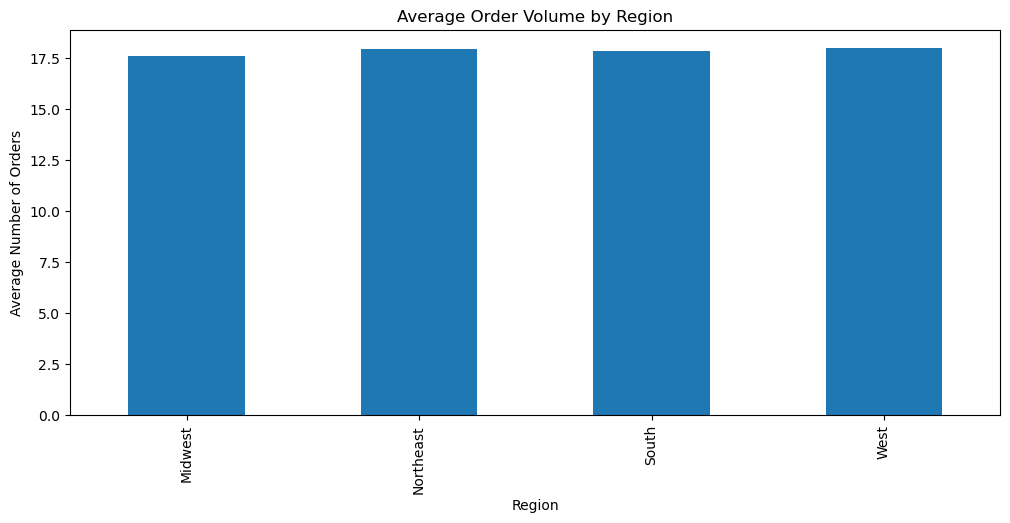

In [426]:
#Creating a bar chart for the Region and order_number columns
region_order_number_bar = cust_dept_merged.groupby('Region').agg({'order_number' : ['mean']}).plot.bar(figsize=(12, 5))
plt.title('Average Order Volume by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Orders')
plt.legend().remove()
plt.show()

In [430]:
#Exporting region_order_number_bar
region_order_number_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_order_number_bar.png'), bbox_inches='tight')

In [170]:
#Crossing Age_group with Region
age_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['Age_group'], dropna = False)

In [171]:
#Viewing the age_region_crosstab
age_region_crosstab

Age_group,adult,middle-aged,senior,young adult
Region,,,,
Midwest,2172532,2286085,1903728,897961
Northeast,1602142,1697295,1484610,679835
South,3092186,3194457,2708062,1314737
West,2346232,2510624,2097867,971334


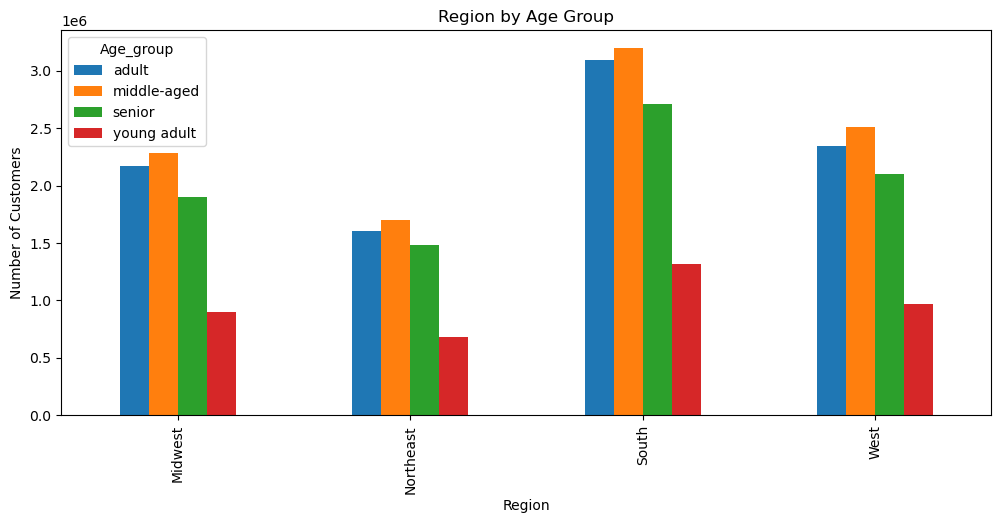

In [172]:
#Creating a bar chart for the age_region_crosstab
age_region_bar = age_region_crosstab.plot.bar(figsize=(12, 5))
plt.title('Region by Age Group')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [173]:
#Exporting age_region_bar
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'), bbox_inches='tight')

In [174]:
#Crossing Income_group with Region
income_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['Income_group'], dropna = False)

In [175]:
#Viewing the income_region_crosstab
income_region_crosstab

Income_group,high income,low income,middle income
Region,,,
Midwest,916042,1025408,5318856
Northeast,677071,789479,3997332
South,1289028,1509183,7511231
West,1008699,1128318,5789040


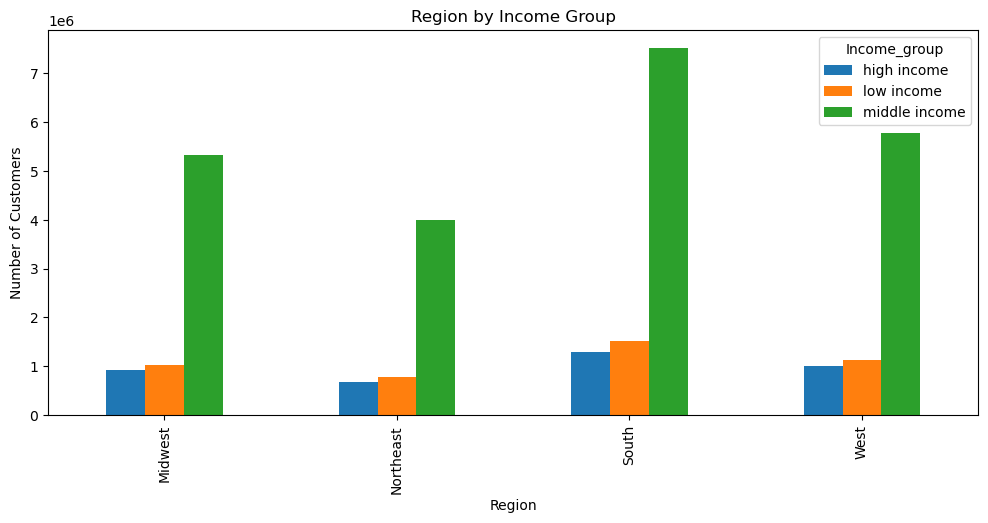

In [176]:
#Creating a bar chart for the income_region_crosstab
income_region_bar = income_region_crosstab.plot.bar(figsize=(12, 5))
plt.title('Region by Income Group')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [177]:
#Exporting income_region_bar
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'), bbox_inches='tight')

In [178]:
#Crossing dependants_flag with Region
dependants_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['dependants_flag'], dropna = False)

In [179]:
#Viewing the dependants_region_crosstab
dependants_region_crosstab

dependants_flag,has dependants,no dependants
Region,,
Midwest,5437775,1822531
Northeast,4109605,1354277
South,7727930,2581512
West,5945869,1980188


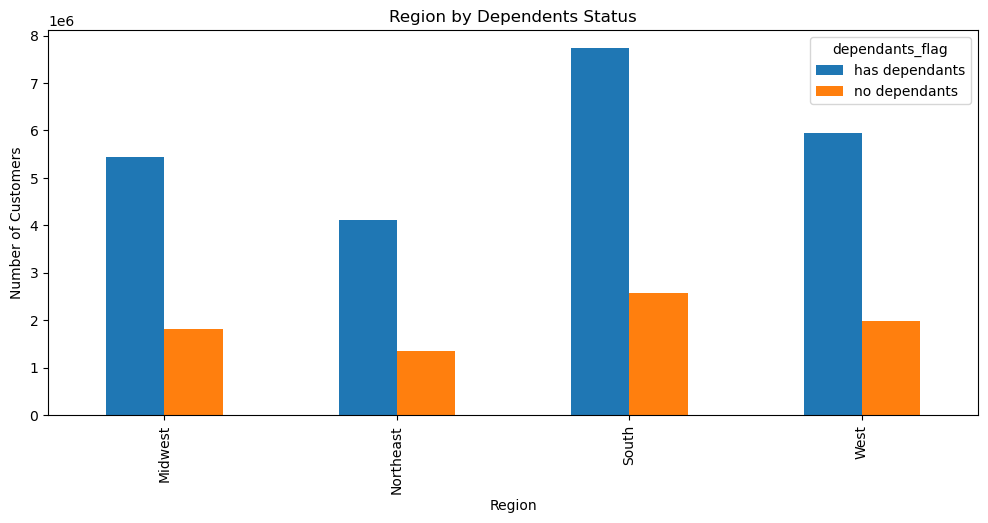

In [180]:
#Creating a bar chart for the dependants_region_crosstab
dependants_region_bar = dependants_region_crosstab.plot.bar(figsize=(12, 5))
plt.title('Region by Dependents Status')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [181]:
#Exporting dependants_region_bar
dependants_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_region_bar.png'), bbox_inches='tight')

In [182]:
#Crossing department with Region
departments_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['department'], dropna = False)

In [183]:
#Viewing the department_region_crosstab
departments_region_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1211283,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,913813,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1721319,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1325890,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


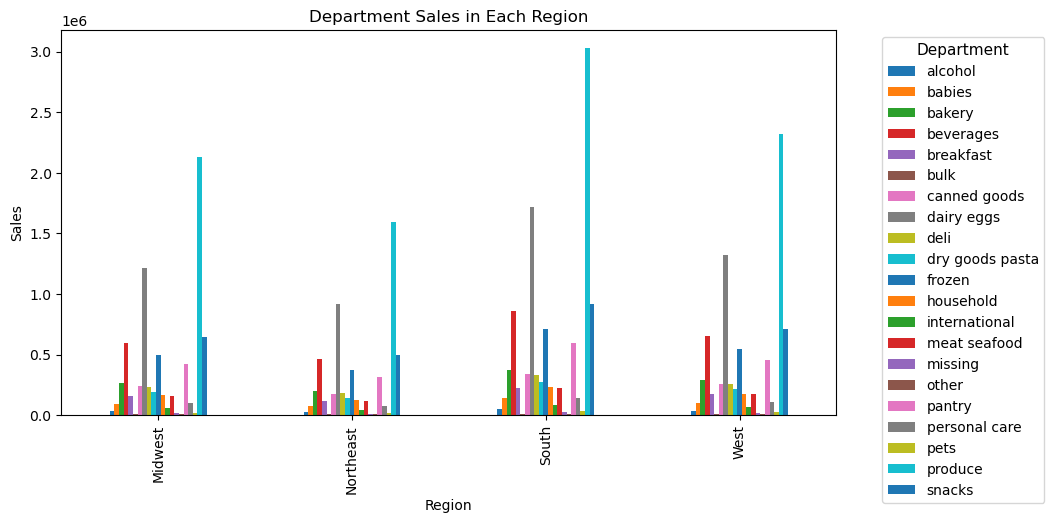

In [184]:
#Creating a bar chart for the departments_region_crosstab
departments_region_bar = departments_region_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales in Each Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [185]:
#Exporting departments_region_bar
departments_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_region_bar.png'), bbox_inches='tight')

In [186]:
#Crossing loyalty_flag with Region
loyalty_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['loyalty_flag'], dropna = False)

In [187]:
#Viewing the loyalty_region_crosstab
loyalty_region_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373472,1136563,3750271
Northeast,1841559,842001,2780322
South,3405328,1593359,5310755
West,2662404,1230873,4032780


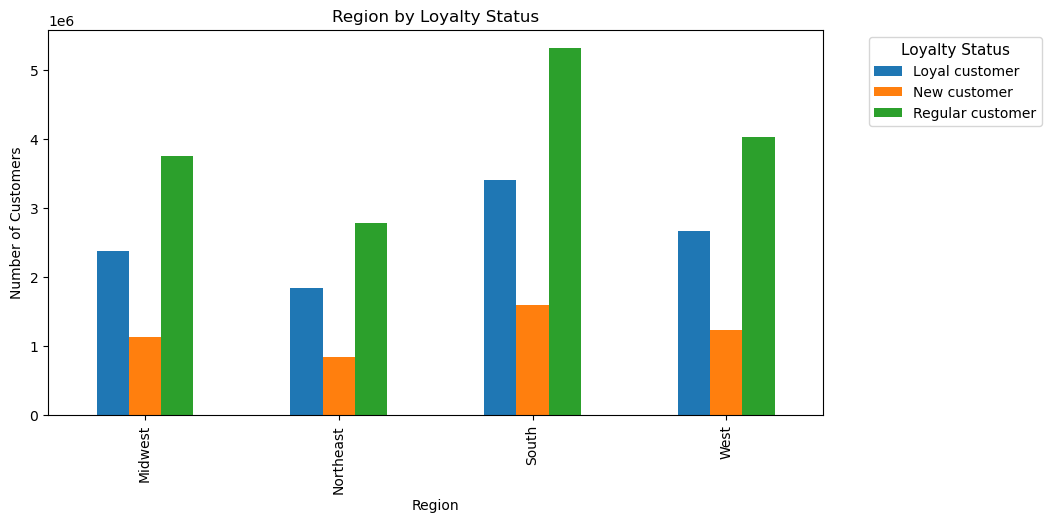

In [188]:
#Creating a bar chart for the loyalty_region_crosstab
loyalty_region_bar = loyalty_region_crosstab.plot.bar(figsize=(10, 5))
plt.title('Region by Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [189]:
#Exporting loyalty_region_bar
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region_bar.png'), bbox_inches='tight')

In [190]:
#Crossing spending_flag with Region
spending_region_crosstab = pd.crosstab(cust_dept_merged['Region'], cust_dept_merged['spending_flag'], dropna = False)

In [191]:
#Viewing the spending_region_crosstab
spending_region_crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,24085,7236221
Northeast,15055,5448827
South,33260,10276182
West,25036,7901021


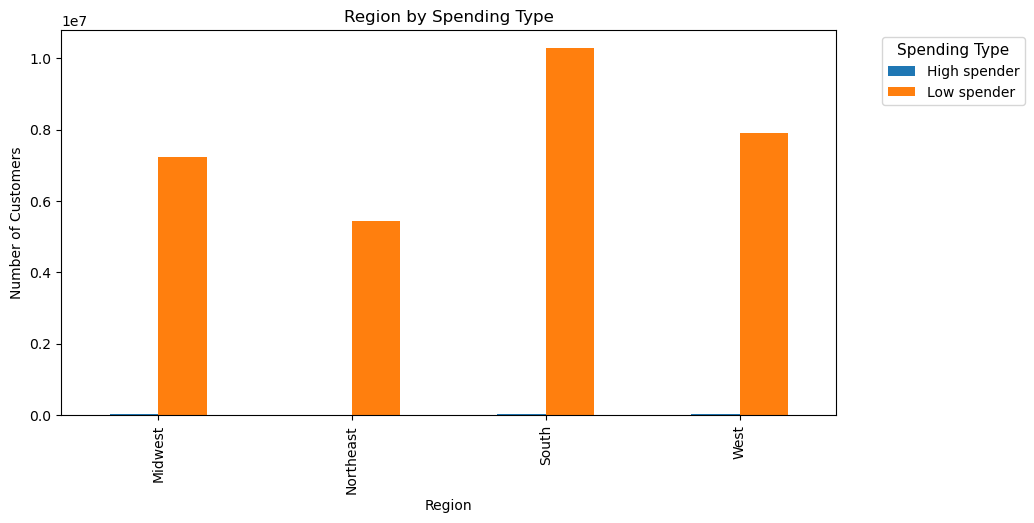

In [192]:
#Creating a bar chart for the spending_region_crosstab
spending_region_bar = spending_region_crosstab.plot.bar(figsize=(10, 5))
plt.title('Region by Spending Type')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [193]:
#Exporting spending_region_bar
spending_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_region_bar.png'), bbox_inches='tight')

In [194]:
#Crossing Age_group with department
age_department_crosstab = pd.crosstab(cust_dept_merged['department'], cust_dept_merged['Age_group'], dropna = False)

In [195]:
#Viewing the age_department_crosstab
age_department_crosstab

Age_group,adult,middle-aged,senior,young adult
department,,,,
alcohol,42167,46579,36693,19188
babies,123044,129910,106204,51234
bakery,334154,350804,295997,139873
beverages,754851,814687,684020,318343
breakfast,198803,211274,175296,85477
bulk,9902,10298,8945,4306
canned goods,302479,315774,267509,126312
dairy eggs,1547768,1610900,1366795,646842
deli,299970,314110,265199,124555


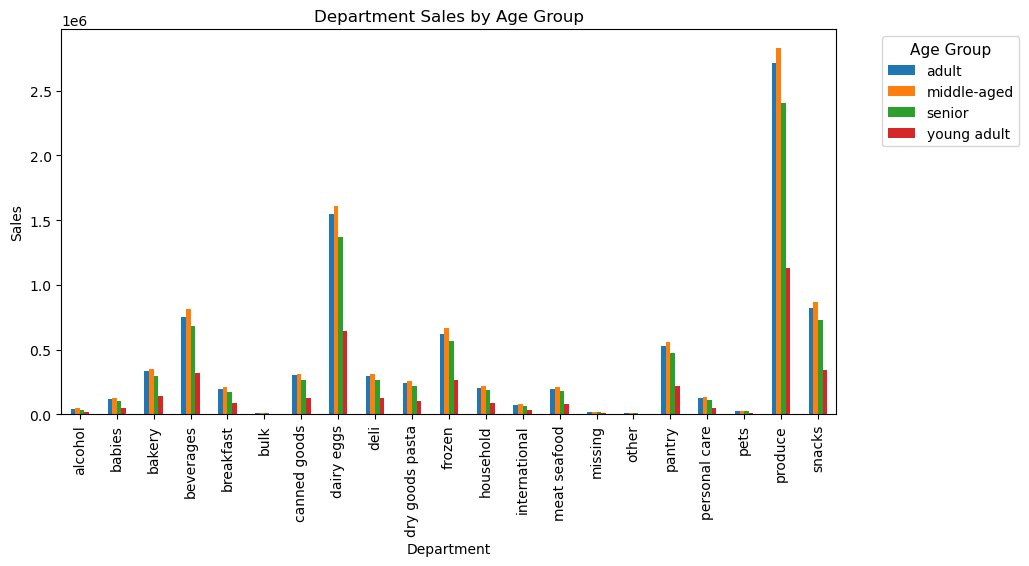

In [196]:
#Creating a bar chart for the age_department_crosstab
age_department_bar = age_department_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales by Age Group')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [197]:
#Exporting age_department_bar
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_department_bar.png'), bbox_inches='tight')

In [198]:
#Crossing Income_group with department
income_department_crosstab = pd.crosstab(cust_dept_merged['department'], cust_dept_merged['Income_group'], dropna = False)

In [199]:
#Viewing the income_department_crosstab
income_department_crosstab

Income_group,high income,low income,middle income
department,,,
alcohol,24067,22199,98361
babies,53001,43438,313953
bakery,148430,144086,828312
beverages,313325,479742,1778834
breakfast,83418,116540,470892
bulk,3671,5974,23806
canned goods,132389,112945,766740
dairy eggs,655455,680816,3836034
deli,125886,141758,736190


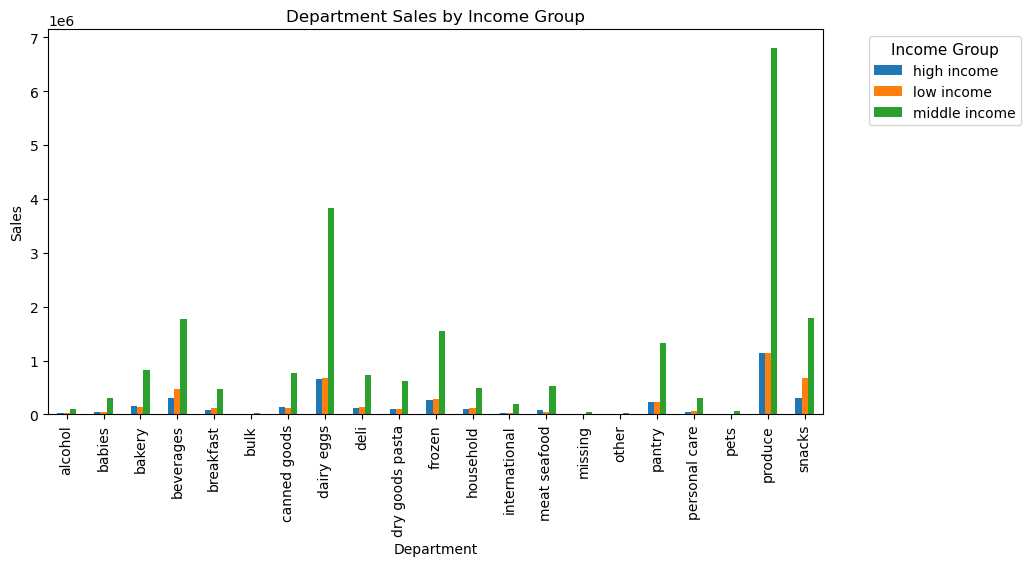

In [200]:
#Creating a bar chart for the income_department_crosstab
income_department_bar = income_department_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales by Income Group')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [201]:
#Exporting income_department_bar
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department_bar.png'), bbox_inches='tight')

In [202]:
#Crossing dependants_flag with department
dependents_department_crosstab = pd.crosstab(cust_dept_merged['department'], cust_dept_merged['dependants_flag'], dropna = False)

In [203]:
#Viewing the dependents_department_crosstab
dependents_department_crosstab

dependants_flag,has dependants,no dependants
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3879102,1293203
deli,750452,253382


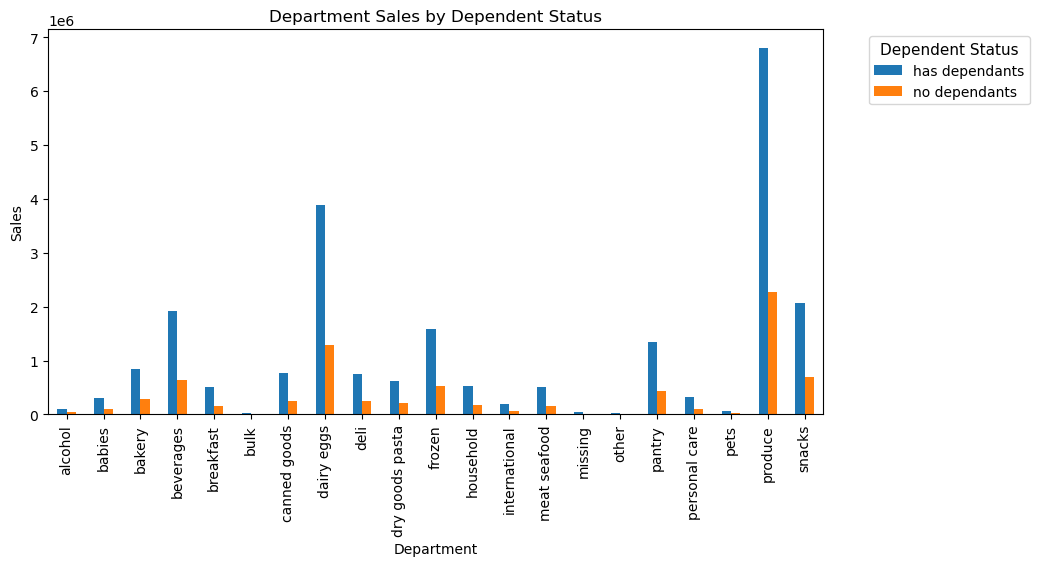

In [204]:
#Creating a bar chart for the dependents_department_crosstab
dependents_department_bar = dependents_department_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales by Dependent Status')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.legend(title='Dependent Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [205]:
#Exporting dependents_department_bar
dependents_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_department_bar.png'), bbox_inches='tight')

In [206]:
#Crossing loyalty_flag with department
loyalty_department_crosstab = pd.crosstab(cust_dept_merged['department'], cust_dept_merged['loyalty_flag'], dropna = False)

In [207]:
#Viewing the loyalty_department_crosstab
loyalty_department_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1829377,749157,2593771
deli,324046,158335,521453


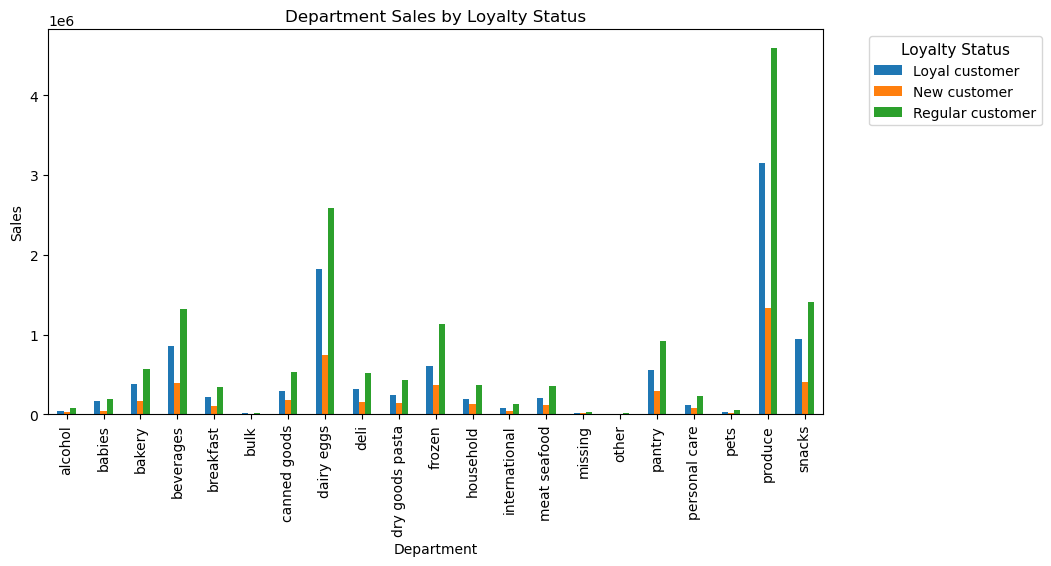

In [208]:
#Creating a bar chart for the loyalty_department_crosstab
loyalty_department_bar = loyalty_department_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [209]:
#Exporting loyalty_department_bar
loyalty_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_department_bar.png'), bbox_inches='tight')

In [210]:
#Crossing spending_flag with department
spending_department_crosstab = pd.crosstab(cust_dept_merged['department'], cust_dept_merged['spending_flag'], dropna = False)

In [211]:
#Viewing the spending_department_crosstab
spending_department_crosstab

spending_flag,High spender,Low spender
department,,
alcohol,1108,143519
babies,331,410061
bakery,3167,1117661
beverages,10427,2561474
breakfast,1710,669140
bulk,59,33392
canned goods,2272,1009802
dairy eggs,19440,5152865
deli,2727,1001107


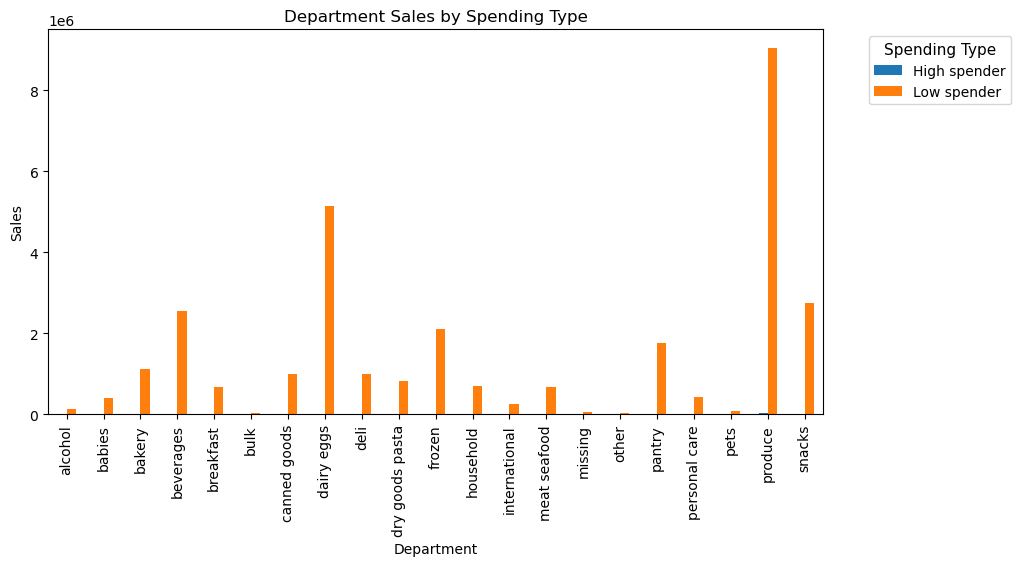

In [212]:
#Creating a bar chart for the spending_department_crosstab
spending_department_bar = spending_department_crosstab.plot.bar(figsize=(10, 5))
plt.title('Department Sales by Spending Type')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.legend(title='Spending Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.show()

In [213]:
#Exporting spending_department_bar
spending_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_department_bar.png'), bbox_inches='tight')

The most customers are in the South followed by the West, Midwest, and Northeast. The South also has the most numbers of customers in each income group followed by the West, Midwest, and Northeast. In each region, significantly more customers have dependents in comparison to those who do not have dependents. In all four regions, the departments with the highest sales are produce, followed by dairy eggs and snacks. All four regions have the same pattern of having the highest number of regular customers, followed by loyal customers and new customers. In all the regions, almost all customers are low spenders. Middle-aged customers contribute the most to sales in all departments, followed by adults, then seniors, and then young adults. Middle income customers contribute the most to sales in all departments. Low income customers contribute the second most to sales in the departments except for alcohol, bakery, canned goods and meat seafood. High income customers contribute the least to sales in the departments with the exception of some departments where they contribute more than or the same as low income customers. Customers with dependents contribute significantly more to sales in all departments than customers without dependents do. Regular customers contribute the most to sales in each departments, followed by loyal customers, and then new customers. Low spending customers contribute to almost all the sales in each department.